## Basic Co-Occurrence Analysis of Human-Cell-Atlas Pancreas Topograhic Maps

Data from Tosti et al, 2021

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
from sonar import sonar, utils

In [6]:
# rel_kernel_path = "/dh-projects/ag-ishaque/analysis/anastasiia/projects/sonar/test/ISS-pancreas/"


In [4]:
# Define the cluster labels of the pancreas tissue matrix:

cluster_labels = ['background',
 'Acinar-i',
 'Acinar-s',
 'Acinar-REG+',
 'Activated Stellate',
 'Quiescent Stellate',
 'Alpha',
 'Beta',
 'Gamma (PP)',
 'Delta',
 'Ductal',
 'MUC5B+ Ductal (PDG)',
 'MHC Class II',
 'Schwan',
 'B cell',
 'T cell',
# 'Endothelial'
]

In [5]:
n_sample = 1

# Load the pancreas tissue matrix:

# tissue_matrix = np.load(os.path.join(*rel_kernel_path.split('/'), 'data','sample_matrices.npz'))['sample_'+str(n_sample)]
tissue_matrix = np.load('/dh-projects/ag-ishaque/analysis/anastasiia/projects/sonar/test/ISS-pancreas/data/sample_matrices.npz')['sample_'+str(n_sample)]

In [ ]:
type(tissue_matrix)

numpy.ndarray

In [ ]:
tissue_matrix.shape

(16, 5960, 7813)

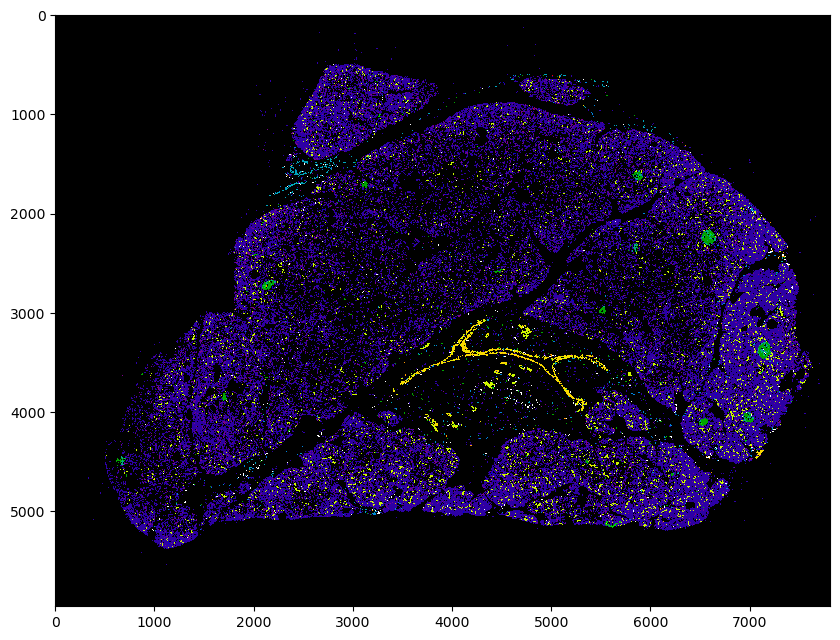

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(tissue_matrix.argmax(axis=0),cmap='nipy_spectral',interpolation='none',vmax=len(cluster_labels)-1,alpha=(tissue_matrix.sum(0)!=0).astype(float))

# # Create a legend for different tissue types:
# legend_elements = [plt.scatter([],[],c=plt.cm.nipy_spectral(i/len(cluster_labels)),label=cluster_labels[i]) for i in range(len(cluster_labels))]

# plt.legend(handles=legend_elements,loc='upper right')

In [14]:
rescaled = utils.rescale_topographic_tensor(tissue_matrix, scaling_factor=0.3).numpy()

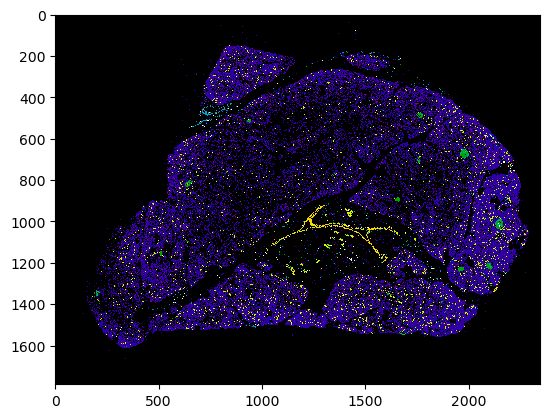

In [ ]:
plt.imshow(rescaled.argmax(axis=0),cmap='nipy_spectral',interpolation='none',vmax=len(cluster_labels)-1,alpha=(rescaled.sum(0)!=0).astype(float))

In [9]:
rescaled.shape

(16, 2980, 3906)

In [7]:
7813/2343

3.3346137430644474

In [10]:
7813/3906

2.0002560163850487

Changing tasks between cpu and gpu

In [11]:
import torch

if torch.cuda.is_available():
    import torch as t
    device = 'cuda:0' # put it in a gpu
else:
    import torch as t
    device='cpu'

# unrelated to the NoteBook, the example of a tensor and how to work with it
new_tens = t.zeros(2,2,2, device=device).cuda()
new_tens.device

device(type='cuda', index=0)

In [15]:
def sig(t, k=1):
    return ((1)/(1+(torch.exp(-t*k))))

def smax(t,k=5):
    return (torch.exp(t*k)/(torch.exp(t*k).sum(0)))

rad_ = 200
lin = 1

son = sonar.Sonar(max_radius=rad_,linear_steps=lin)

cooc_template_ = son.co_occurrence_from_tensor(rescaled,interpolate=True)


In [12]:
cooc_template_.shape

(16, 16, 500)

In [ ]:
# plt.rcParams['figure.figsize'] = [8, 8]
# plt.plot(cooc_template_[1,10])

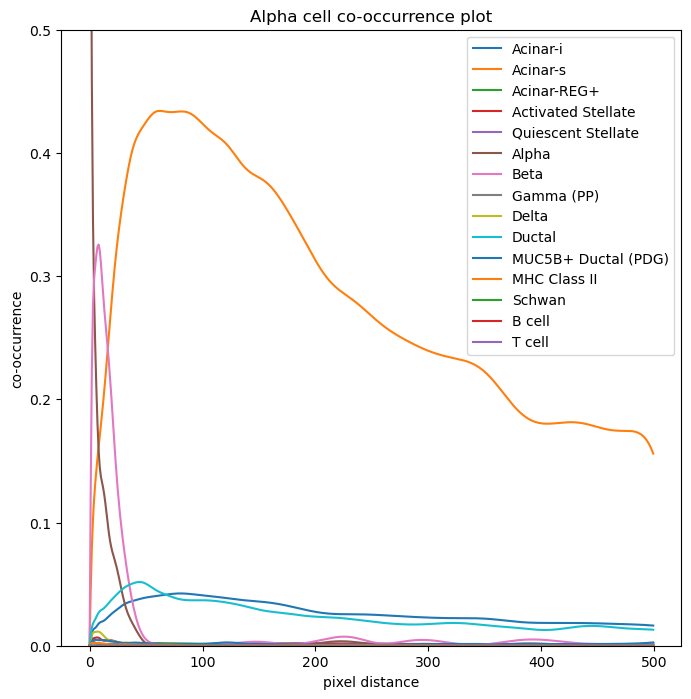

In [ ]:
for im in range (15):
    
    # plt.subplot(4,5, im+1) #background excluded
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.rcParams['font.size'] = '10'
    plt.plot(cooc_template_[6,im+1], label = cluster_labels[im+1])
    plt.title(cluster_labels[im+1])
    plt.title("Alpha cell co-occurrence plot")
    plt.ylim((0,0.5))
    plt.xlabel('pixel distance')
    plt.ylabel('co-occurrence')
    plt.legend()

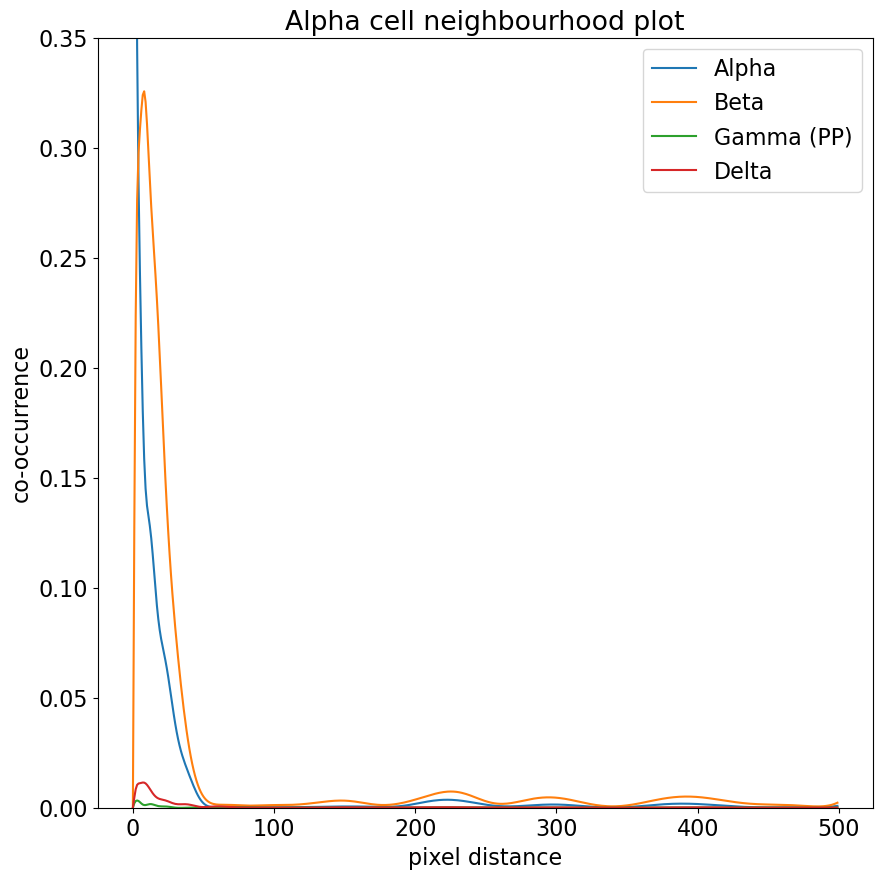

In [ ]:
cell_types_of_interest = [6,7,8,9]

for im in cell_types_of_interest:
    
    # plt.subplot(4,5, im+1) #background excluded
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rcParams['font.size'] = '16'

    plt.plot(cooc_template_[6,im], label = cluster_labels[im])
    plt.title("Alpha cell neighbourhood plot")
    plt.ylim((0,0.35))
    plt.xlabel('pixel distance')
    plt.ylabel('co-occurrence')
    plt.legend()
    # plt.xlim((0,500))

# plt.savefig("/dh-projects/ag-ishaque/analysis/anastasiia/projects/sonar/test/ISS-pancreas/a-cell-plot-scale03-d500.png")

In [24]:
len(cooc_template_[7,6])

500

In [20]:
int(120/3.3346137430644474)

35

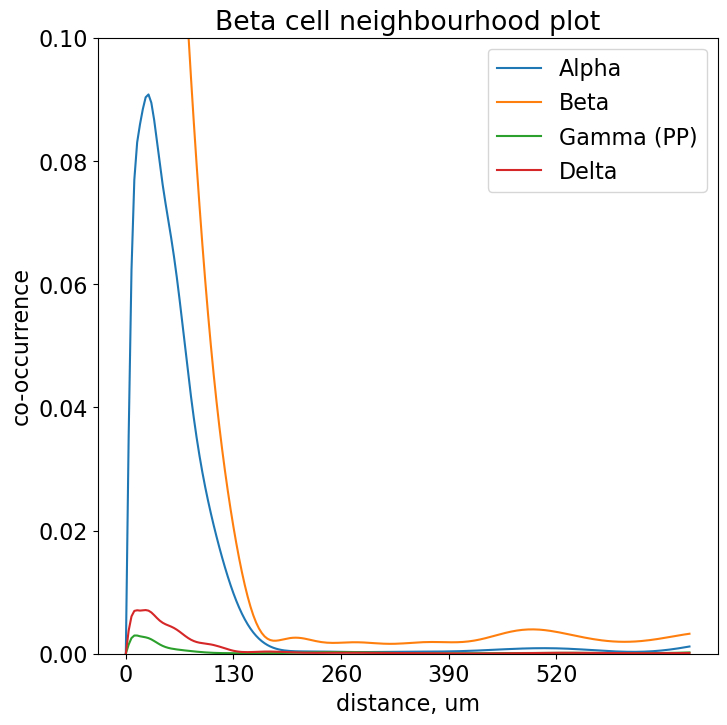

In [24]:
cell_types_of_interest = [6,7,8,9]

for im in cell_types_of_interest:
    
    # plt.subplot(4,5, im+1) #background excluded
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.rcParams['font.size'] = '16'

    plt.plot(cooc_template_[7,im], label = cluster_labels[im])
    plt.title("Beta cell neighbourhood plot")
    plt.ylim((0,0.1))
    plt.xlabel('distance, um')
    plt.ylabel('co-occurrence')
    plt.legend()
    plt.xticks(range(0,int(600/3.3346137430644474),int(130/3.3346137430644474)), range(0,600,130))

# plt.savefig("/dh-projects/ag-ishaque/analysis/anastasiia/projects/sonar/test/ISS-pancreas/b-cell-plot-scale03-d500.png")

In [37]:
cell_matrix_ecm = torch.zeros((rescaled.shape[0]+1,)+rescaled.shape[1:])
cell_matrix_ecm[:-1]=torch.tensor(rescaled)
cell_matrix_ecm[-1]=~(cell_matrix_ecm.sum(0)>0)

# plt.imshow(cell_matrix_ecm[-1].cpu())

cell_matrix_ecm = cell_matrix_ecm.cpu().numpy()

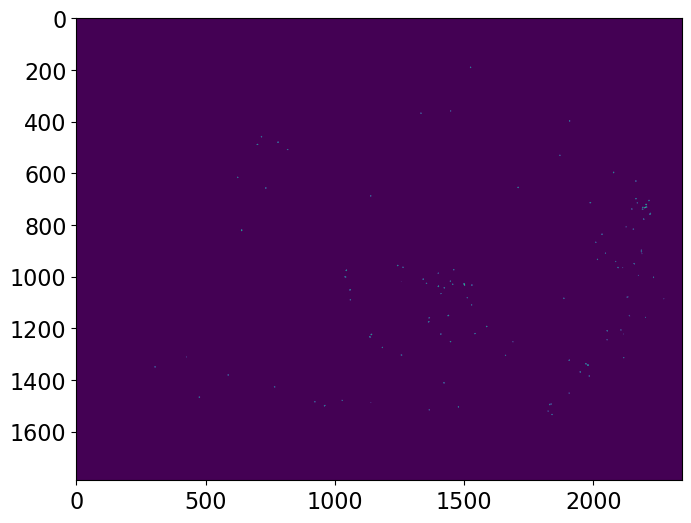

In [ ]:
plt.imshow(rescaled[12])
plt.rcParams['figure.figsize'] = [11, 6]

Splitting and merging of the image channels

In [25]:
rescaled.shape

(16, 1788, 2343)

In [26]:
rescaled_splitted = np.split(rescaled, 16)

In [ ]:
rescaled_splitted[1].shape

(1, 1788, 2343)

In [27]:
islet_stack = np.add.reduce([rescaled_splitted[6],rescaled_splitted[7],rescaled_splitted[8],rescaled_splitted[9]])

In [28]:
islet_stack.shape

(1, 1788, 2343)

In [ ]:
others_index = [1, 2, 3, 4, 5, 10, 11, 12, 13]
others = []

for i in others_index:
    others.append(rescaled_splitted[i])

others_stack = np.add.reduce(others)
others_stack.shape

(1, 1788, 2343)

In [ ]:
# plt.imshow(others_stack[0])
# plt.rcParams['figure.figsize'] = [11, 6]

In [ ]:
both_stack = np.concatenate([islet_stack,others_stack])
both_stack.shape

(2, 1788, 2343)

In [29]:
def sig(t, k=1):
    return ((1)/(1+(torch.exp(-t*k))))

def smax(t,k=5):
    return (torch.exp(t*k)/(torch.exp(t*k).sum(0)))

rad_ = 700
lin = 1

son = sonar.Sonar(max_radius=rad_,linear_steps=lin)

cooc_template_ = son.co_occurrence_from_tensor(islet_stack,interpolate=True)

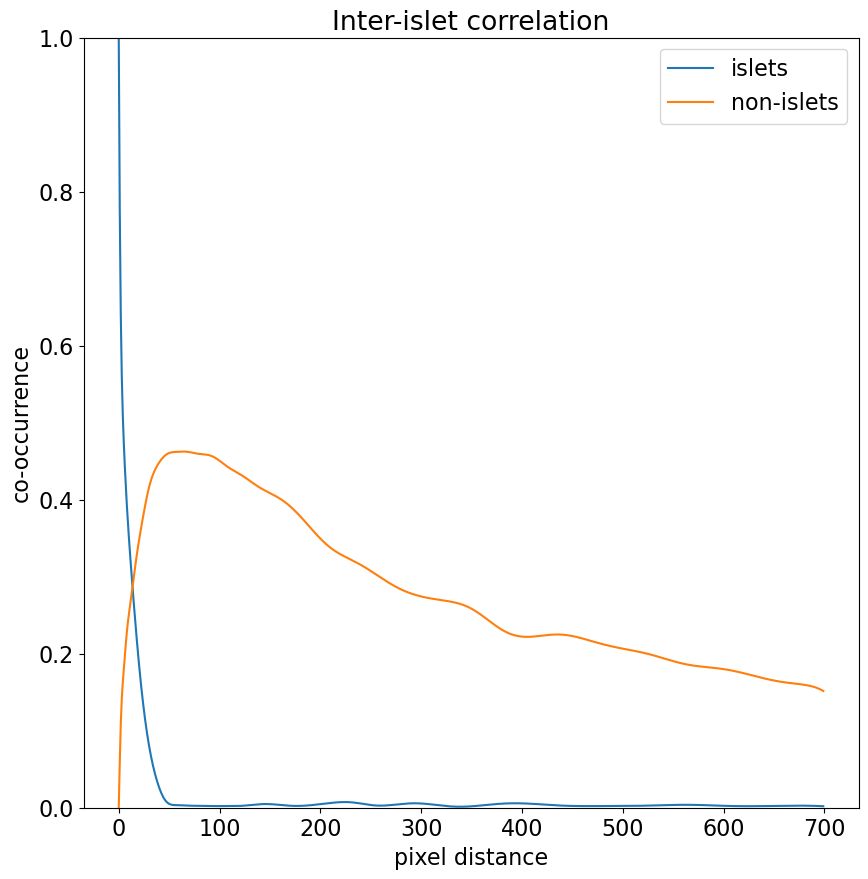

In [ ]:
tissues_list = ["islets", "non-islets"]
cell_types_of_interest = [0,1]

for im in cell_types_of_interest:
    
    # plt.subplot(4,5, im+1) #background excluded
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rcParams['font.size'] = '16'

    plt.plot(cooc_template_[0,im], label = tissues_list[im])
    plt.title("Inter-islet correlation")
    plt.ylim((0,1))
    plt.xlabel('pixel distance')
    plt.ylabel('co-occurrence')
    plt.legend()
    # plt.xlim((0,500))

([<matplotlib.axis.XTick at 0x7f1475c640a0>,
 [Text(0, 0, '0'),
  Text(119, 0, '400'),
  Text(238, 0, '800'),
  Text(357, 0, '1200'),
  Text(476, 0, '1600'),
  Text(595, 0, '2000')])

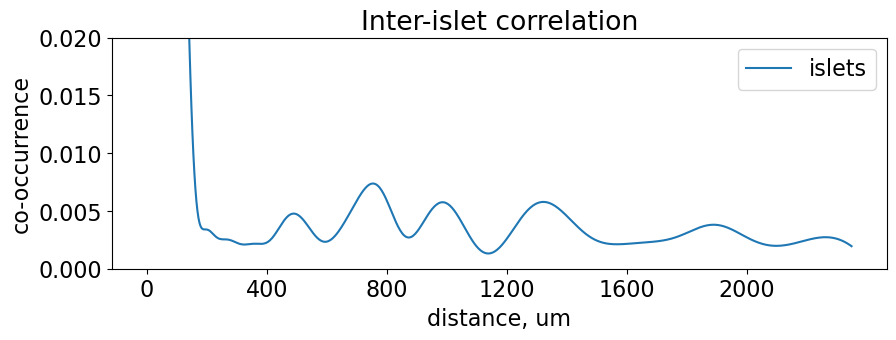

In [37]:
plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['font.size'] = '16'

plt.plot(cooc_template_[0,0], label = "islets")
plt.title("Inter-islet correlation")
plt.ylim((0,0.02))
plt.xlabel('distance, um')
plt.ylabel('co-occurrence')
plt.legend()
plt.xticks(range(0,int(2100/3.3346137430644474),int(400/3.3346137430644474)), range(0,2100,400))